<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-34/blob/main/Entrega_1_(16_11)_%3E_Limpieza%2C_an%C3%A1lisis%2C_visualizaci%C3%B3n_y_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombres : Katherine Vanegas Salamanca / David Andrés González Medina

Matricula : A01794113 / A01794025

Materia: Ciencia de Datos

Profesor: Maria de la Paz Rico / Roberto Antonio Guevara González

Actividad: Actividad Semanal -- 9 Parte 1

Limpieza de base de datos.

Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas)
Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
Identificar correlaciones.
Preparar los datos 
Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.


In [11]:
# Se importan las librerías requeridas

import pandas as pd
import numpy as np
import matplotlib as mpl
import requests, zipfile
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from warnings import filterwarnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from warnings import filterwarnings
from sklearn.impute import SimpleImputer

In [12]:
# Kmeans

! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import geopandas as gpd
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# En está sección se llama la Base de Datos a utilizar mediante la variable path. Luego se crea el DataFrame y se imprime las 5 primeras

# path = 'https://github.com/PosgradoMNA/actividades-del-projecto-equipo-34/blob/main/Proyecto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'

#path = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

#req = requests.get(path)

#zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')

#df = pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')

df= pd.read_csv('/content/drive/Shareddrives/Proyecto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
y = df['SEMAFORO']


df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


## **Exploración de datos**

In [30]:
#descripcion estadistica de la base de datos de calidad de aguas subterraneas para el año 2020
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [21]:
#nombre de las variables que conforman el dataset
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [22]:
#Validación de datos faltantes en todo el dataframe
df.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [23]:
#descripción del dataframe y sus variables, en cuanto al tipo de datos que tiene cada columna y los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [24]:
#clasificación de las variables entre categoricas y númericas, asi como la extracion de las variables numericas del dataframe original 
categoricas = ['CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR',
                       'CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB',
                       'CALIDAD_MN','CALIDAD_FE']

numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

df_num = df[['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

df_num

,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,NaN,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,NaN,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,NaN,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,NaN,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,NaN,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,NaN,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,NaN,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,NaN,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,NaN,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


In [25]:
for i in numericas:
  print(" nombre de la columna " + i)
  print(" sumatoria por valores unicos") 
  print(df[i].value_counts())



 nombre de la columna ALC_mg/L
 sumatoria por valores unicos
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
 nombre de la columna CONDUCT_mS/cm
 sumatoria por valores unicos
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
 nombre de la columna SDT_mg/L
 sumatoria por valores unicos
Series([], Name: SDT_mg/L, dtype: int64)
 nombre de la columna SDT_M_mg/L
 sumatoria por valores unicos
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
 nombre de la columna FLUORUROS_mg/L
 sumatoria por valores unicos
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185

'for i in df.columns:\n    print("nombre de la columna", df[i].column)\n    print("Valores unicos", df[i].unique())'

## **Limpieza de datos**

In [26]:
#mediante el ciclo for se reemplazan los valores con simbolo <(menor que) a valores númericos por debajo del valor original 1 decima,
#con este cambio las variables quedan tipo float
for columna in numericas:
  df_num[columna] = df_num[columna].astype('str')
  df_num[columna] = df_num[columna].str.replace('<25','24.9') 
  df_num[columna] = df_num[columna].str.replace('<0.2','0.19') 
  df_num[columna] = df_num[columna].str.replace('<20','19.9') 
  df_num[columna] = df_num[columna].str.replace('<1.1','1.09')
  df_num[columna] = df_num[columna].str.replace('<0.02','0.019') 
  df_num[columna] = df_num[columna].str.replace('<0.01','0.009') 
  df_num[columna] = df_num[columna].str.replace('<0.003','0.0029')
  df_num[columna] = df_num[columna].str.replace('<0.005','0.0039') 
  df_num[columna] = df_num[columna].str.replace('<0.0005','0.00039') 
  df_num[columna] = df_num[columna].str.replace('<0.0015','0.00149') 
  df_num[columna] = df_num[columna].str.replace('<0.025','0.0249')  
  df_num[columna]= df_num[columna].astype('float')

df_num.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


In [27]:
df_num.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L',
       'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L',
       'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L',
       'MN_TOT_mg/L', 'FE_TOT_mg/L'],
      dtype='object')

In [28]:
# se elimina la columna 'SDT_mg/L' ya que la totalidad de sus datos son NaN
df_num.drop('SDT_mg/L', axis=1, inplace=True)
df_num

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.09,4.184656,0.0161,0.0029,0.0039,0.00039,0.0039,0.00149,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.09,5.750110,0.0134,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
2,204.920,532.0,342.0000,1.8045,120.7190,1.09,1.449803,0.0370,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
3,327.000,686.0,478.6000,1.1229,199.8790,1.09,1.258597,0.0154,0.0029,0.0050,0.00039,0.0039,0.00149,0.01950
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.00,15.672251,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.1900,752.0960,1.09,14.615488,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
1064,256.000,529.0,297.0000,0.1900,273.0000,1.09,77.392000,0.0090,0.0029,0.0039,0.00039,0.0039,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.00,36.477104,0.0090,0.0029,0.0039,0.00039,0.0039,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.09,0.019000,0.0090,0.0029,0.0039,0.00039,0.0039,0.01200,0.17860


In [31]:
#Las variables CONDUCT_mS/cm, ALC_mg/L, SDT_M_mg/L, DUR_mg/L, N_NO3_mg/L y FLUORUROS_mg/L tienen datos faltantes
df_num.isna().sum().sort_values(ascending=False)

CONDUCT_mS/cm          6
ALC_mg/L               4
SDT_M_mg/L             2
DUR_mg/L               1
N_NO3_mg/L             1
FLUORUROS_mg/L         0
COLI_FEC_NMP/100_mL    0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64

In [32]:
# Imputación de datos faltantes a las variables númericas

numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
                      ]

for columna in numericas:
  median = df_num[columna].median() 
  df_num[columna]= df_num[columna].replace(np.nan, median)

df_num

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.09,4.184656,0.0161,0.0029,0.0039,0.00039,0.0039,0.00149,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.09,5.750110,0.0134,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
2,204.920,532.0,342.0000,1.8045,120.7190,1.09,1.449803,0.0370,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
3,327.000,686.0,478.6000,1.1229,199.8790,1.09,1.258597,0.0154,0.0029,0.0050,0.00039,0.0039,0.00149,0.01950
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.00,15.672251,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.1900,752.0960,1.09,14.615488,0.0090,0.0029,0.0039,0.00039,0.0039,0.00149,0.01950
1064,256.000,529.0,297.0000,0.1900,273.0000,1.09,77.392000,0.0090,0.0029,0.0039,0.00039,0.0039,0.00709,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.00,36.477104,0.0090,0.0029,0.0039,0.00039,0.0039,0.02420,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.09,0.019000,0.0090,0.0029,0.0039,0.00039,0.0039,0.01200,0.17860


In [33]:
#descripcion estadistica de la base de datos númerica
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.558455,116.661485,26.64000,164.048750,215.527500,292.423750,1650.000000
CONDUCT_mS/cm,1068.0,1137.133052,1242.292889,50.40000,505.500000,815.000000,1321.250000,18577.000000
SDT_M_mg/L,1068.0,895.454092,2748.991324,24.90000,337.700000,550.400000,915.900000,82170.000000
FLUORUROS_mg/L,1068.0,1.074083,1.924973,0.19000,0.267175,0.503500,1.139850,34.803300
DUR_mg/L,1068.0,347.839569,359.516802,19.90000,121.274100,245.335800,453.930000,3810.692200
COLI_FEC_NMP/100_mL,1068.0,355.483455,2052.458207,1.09000,1.090000,1.090000,13.250000,24196.000000
N_NO3_mg/L,1068.0,4.317602,8.341535,0.01900,0.650932,2.080932,5.200047,121.007813
AS_TOT_mg/L,1068.0,0.018855,0.035420,0.00900,0.009000,0.009000,0.009000,0.452200
CD_TOT_mg/L,1068.0,0.002930,0.000898,0.00290,0.002900,0.002900,0.002900,0.032110
CR_TOT_mg/L,1068.0,0.012396,0.154439,0.00390,0.003900,0.003900,0.003900,5.003200


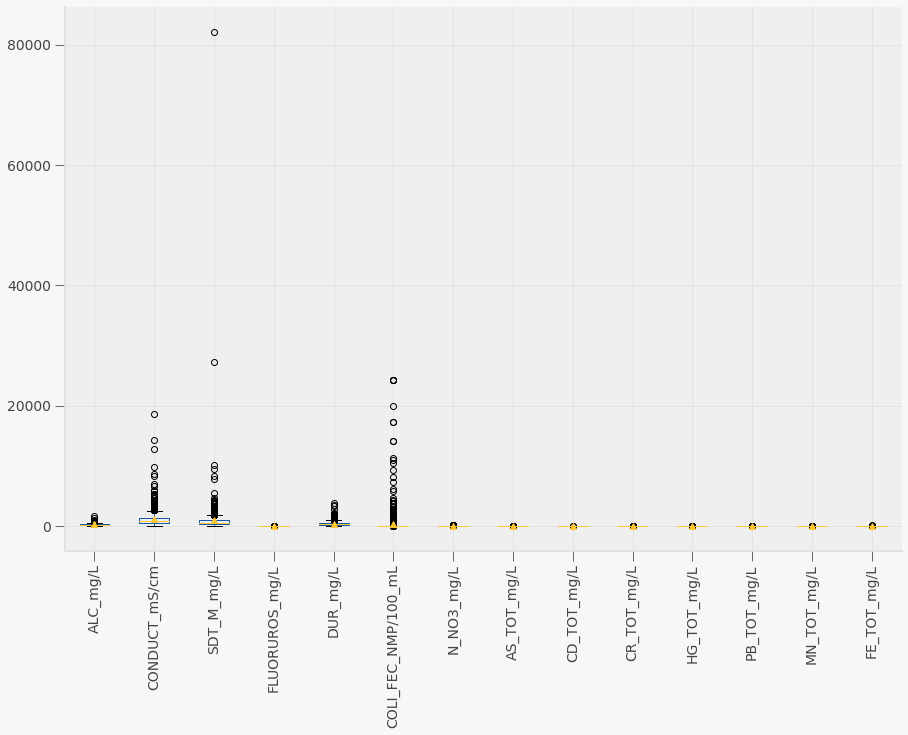

In [34]:
# Boxplot donde se puede evidenciar los outliers

val_atp = df_num.boxplot(figsize = (15,10),showmeans = True)
val_atp.plot()
plt.xticks(rotation=90)

plt.show()

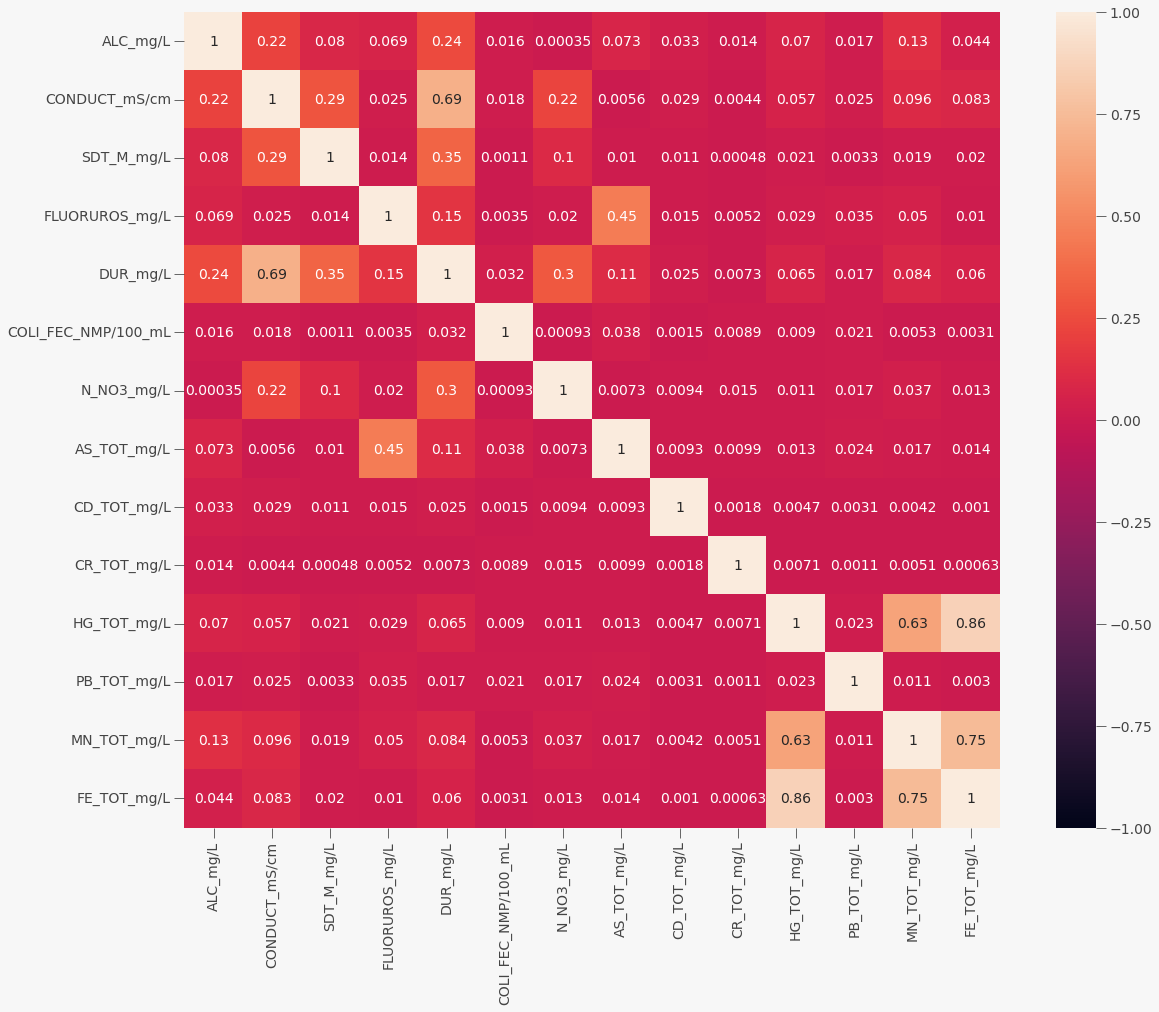

In [35]:
# Matriz de Correlación

mat_corr = df_num.corr().abs()

f, ax = plt.subplots(figsize = (20,15))
sns.heatmap(mat_corr, vmax = 1, vmin = -1, square = True, annot = True)

## **Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.**

In [36]:
yd = np.array(y)
yd

array(['Verde', 'Verde', 'Rojo', ..., 'Rojo', 'Verde', 'Verde'],
      dtype=object)

In [19]:
#Se explora la variable Semaforo y la concetracion de datos que tiene en cada categoria
y.value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [40]:
# Se reemplaza en la variable de salida los datos categoricos por númericos para el analisis

df_location = df[['LONGITUD', 'LATITUD']]

yd[yd == 'Verde'] = 3
yd[yd == 'Rojo'] = 1
yd[yd == 'Amarillo'] = 2

yd1 = yd.astype(int)

In [42]:
#se crea 'COORDENADAS' asignando las latitudes y longitudes de los pozos
df_location["COORDENADAS"] = list(zip(df_location.LONGITUD, df_location.LATITUD))
df_location["COORDENADAS"] = df_location["COORDENADAS"].apply(Point)
df_location.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


In [43]:
gdf = gpd.GeoDataFrame(df_location, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


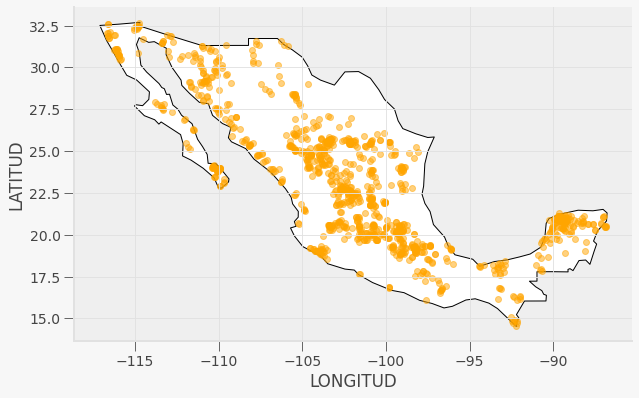

In [47]:
# Se grafica con el mapa de Mexico las latitudes y longitudes 

fig, gax = plt.subplots(figsize=(10,10))

labels = yd1

colores=['green','green','yellow', 'red']
asignar=[]
for i in labels:
    asignar.append(colores[i])

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
gdf.plot(ax=gax, color = 'orange', alpha = 0.5)


gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)


## **Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**

In [45]:
# Modelo Kmeans

df_location = df[['LONGITUD', 'LATITUD']]
df_location

y

0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
        ...  
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde
Name: SEMAFORO, Length: 1068, dtype: object

In [49]:
gdf = gpd.GeoDataFrame(df_location, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


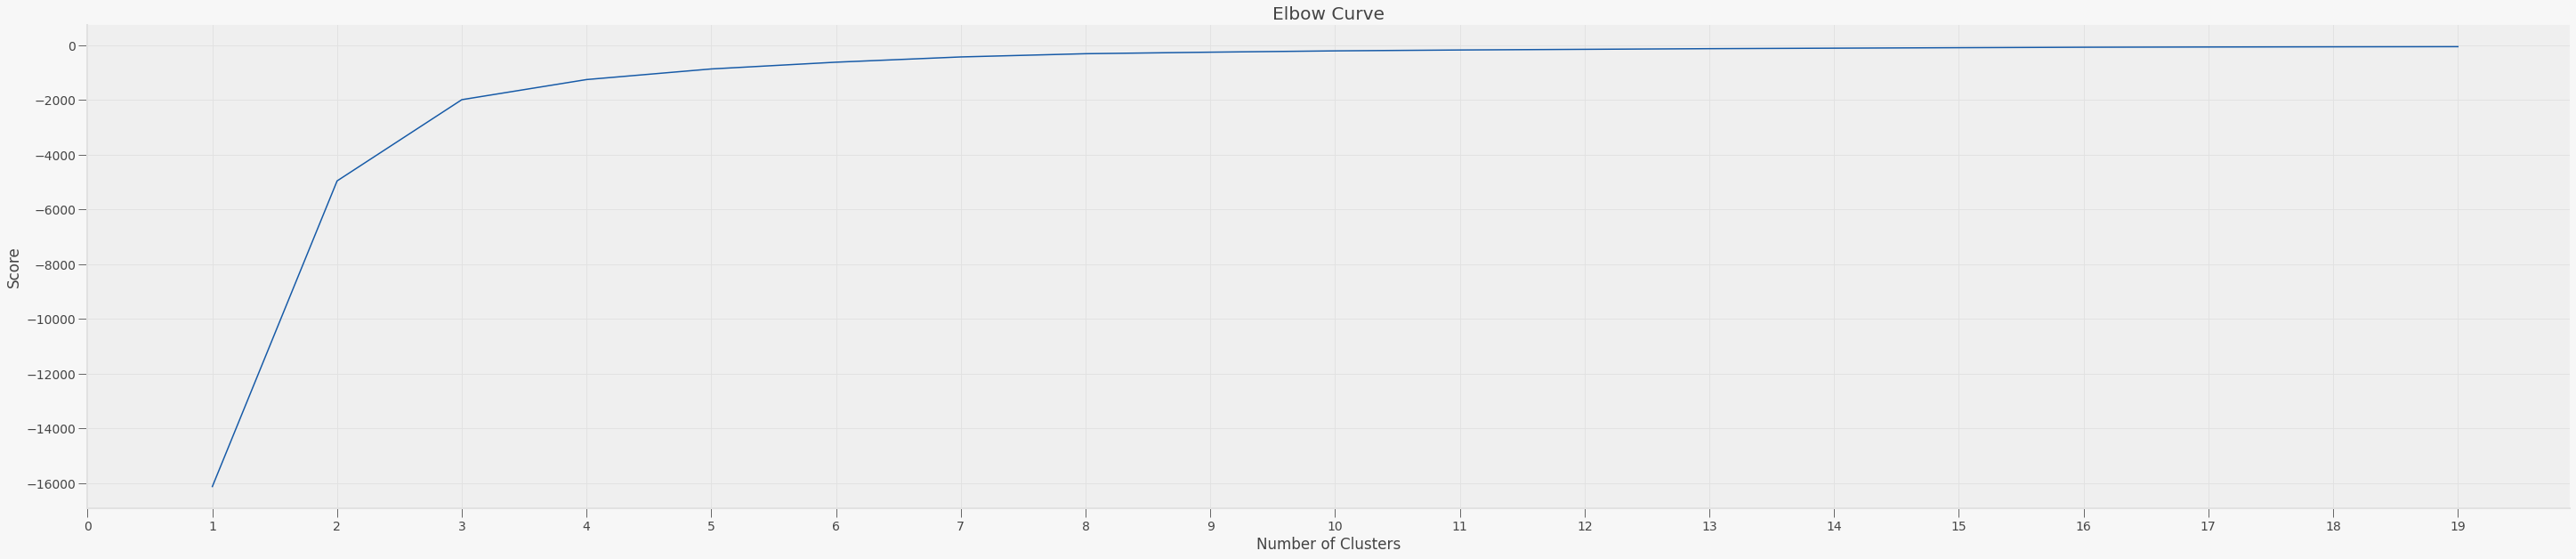

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init ='k-means++')
# do clustering
kmeans.fit(df_location[df_location.columns[0:2]])
# save results
labels = kmeans.labels_
labels

#Por medio del grafico de elbow se determina el número de cluster optimo
K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_location[['LATITUD']]
X_axis = df_location[['LONGITUD']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]


plt.figure(figsize=(50,10))
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(range(20))
plt.show()

De acuerdo a la curva Elbow 3 clusters serian los optimos para trabajar

In [58]:
# Determinar los centroides del ejercicio los cuales representan el centro de cada K - mean (Puntos Óptimos)

X = df[["LONGITUD","LATITUD"]]

kmeans = KMeans(n_clusters = 3).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)

# Obtener los clusters
C = kmeans.cluster_centers_

# Generar una lista que contenga las coordenadas
C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)

# Utilizar la librería Geopandas para crear el mapa a partir de los datos
gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C

,0,1,Coordinates
0,-101.722127,22.254226,POINT (-101.72213 22.25423)
1,-110.794488,28.438202,POINT (-110.79449 28.43820)
2,-90.728470,19.473362,POINT (-90.72847 19.47336)


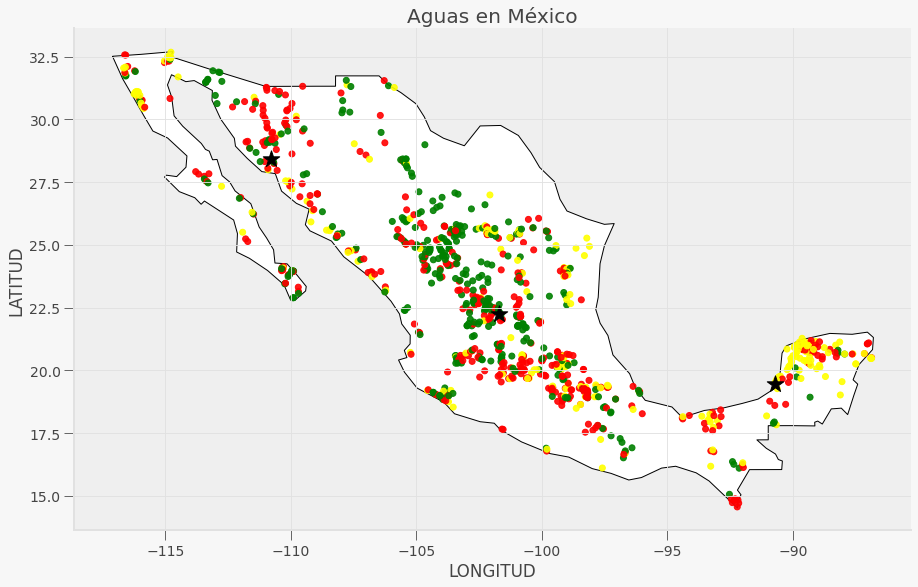

In [59]:
# Dibujar los clusters de México

fig, gax = plt.subplots(figsize=(15, 10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color=asignar, alpha = 0.9)
gdf_C.plot(ax=gax, color = 'black', alpha = 1, markersize = 300, marker = '*')

# Generar el plot para los clusters
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

De acuerdo al grafico en la zona centro de Mexico se denota un alta concentracion de pozos que cumplen con todos los parametros evaluados segun la metodologia siendo esta agua potable en este misma ubicacion el modelo genera un cluster, los pozos en rojo cuya ponderacion se ubica en el segundo lugar y que no cumplen con ninguna medicion siendo aguna no potable, muestra un ligera concentracion en la zona central baja y central superior del pais donde se ubica el segundo cluster con mas pozos de agua no potable alrededor.